In [13]:
!pip install tensorflow-gpu

     |████████████████████████████████| 377.0MB 65kB/s 


In [1]:
import matplotlib.pylab as plt
%matplotlib inline

from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 11s 0us/step


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
p_train = X_train[:40000]
p_train_labels = y_train[:40000]

p_val = X_train[40000:]
p_val_labels = y_train[40000:]

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    channel_shift_range=50,
    horizontal_flip=True)

validationgen = ImageDataGenerator(rescale=1./255)

In [0]:
testdatagen = ImageDataGenerator(rescale=1./255)
testdatagen.fit(X_test)

In [0]:
datagen.fit(p_train)
validationgen.fit(p_val)

In [8]:
from keras import layers
from keras import models
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense

model = models.Sequential()
model.add(Conv2D(64, (2, 2), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (4, 4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (4, 4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (2, 2), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (4, 4), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.summary()








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 31, 64)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 64)        65600     
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 31, 31, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0        

In [9]:
model.compile(optimizer='Adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
history = model.fit_generator(datagen.flow(p_train, p_train_labels, batch_size = 128),
                             steps_per_epoch=len(p_train)/128, 
                             validation_data=validationgen.flow(p_val, p_val_labels), 
                             validation_steps=len(p_val)/128, 
                             epochs = 25)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/25
313/312 [==============================] - 56s 180ms/step - loss: 2.2675 - acc: 0.1576 - val_loss: 2.3092 - val_acc: 0.0941
Epoch 2/25
313/312 [==============================] - 51s 162ms/step - loss: 2.0916 - acc: 0.1915 - val_loss: 1.9803 - val_acc: 0.1954
Epoch 3/25
313/312 [==============================] - 51s 163ms/step - loss: 2.0026 - acc: 0.2172 - val_loss: 1.9126 - val_acc: 0.2358
Epoch 4/25
313/312 [==============================] - 51s 164ms/step - loss: 1.9482 - acc: 0.2291 - val_loss: 1.8022 - val_acc: 0.2731
Epoch 5/25
313/312 [==============================] - 51s 164ms/step - loss: 1.9339 - acc: 0.2338 - val_loss: 1.7359 - val_acc: 0.2915
Epoch 6/25
313/312 [==============================] - 51s 164ms/step - loss: 1.9086 - acc: 0.2427 - val_loss: 1.6844 - val_acc: 0.3176
Epoch 7/25
313/312 [==============================] - 51s 164ms/step - loss: 1.8919 - acc: 0.249

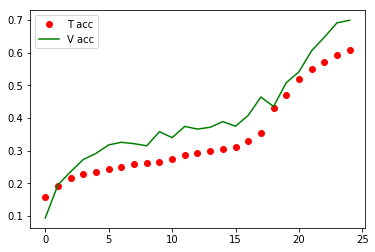

In [11]:
ha = history.history['acc']
va = history.history['val_acc']
epochs = range(len(ha))
plt.plot(epochs, ha, 'ro', label='T acc')
plt.plot(epochs, va, 'g', label='V acc')
plt.legend();

In [12]:
test_loss, test_acc = model.evaluate_generator(testdatagen.flow(test_images,
                                                                test_labels, 
                                                                batch_size=128), 
                                               steps=len(test_images)/128)

NameError: ignored

In [0]:
test_acc

In [0]:
model.save('cifar_datagen_90.1')